<a href="https://colab.research.google.com/github/MJDatascience89/MJDatascience89/blob/main/Vehiclepricemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
vehchle = pd.read_csv('/content/vehicles2024new.csv')

In [4]:
vehchle.head()

,Unnamed: 0,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,0,Jeep,Wagoneer,2024,74600,24V GDI DOHC Twin Turbo,6,Gasoline,10,8-Speed Automatic,Series II,SUV,4,White,Global Black,Four-wheel Drive
1,1,Jeep,Grand Cherokee,2024,50170,OHV,6,Gasoline,1,8-Speed Automatic,Laredo,SUV,4,Metallic,Global Black,Four-wheel Drive
2,3,Dodge,Durango,2023,46835,16V MPFI OHV,8,Gasoline,32,8-Speed Automatic,Pursuit,SUV,4,White Knuckle Clearcoat,Black,All-wheel Drive
3,4,RAM,3500,2024,81663,24V DDI OHV Turbo Diesel,6,Diesel,10,6-Speed Automatic,Laramie,Pickup Truck,4,Silver,Black,Four-wheel Drive
4,5,Nissan,Murano,2024,46000,24V MPFI DOHC,6,Gasoline,3838,Automatic CVT,Platinum,SUV,4,White,Gray,All-wheel Drive


In [5]:
vehchle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      750 non-null    int64 
 1   make            750 non-null    object
 2   model           750 non-null    object
 3   year            750 non-null    int64 
 4   price           750 non-null    int64 
 5   engine          750 non-null    object
 6   cylinders       750 non-null    int64 
 7   fuel            750 non-null    object
 8   mileage         750 non-null    int64 
 9   transmission    750 non-null    object
 10  trim            750 non-null    object
 11  body            750 non-null    object
 12  doors           750 non-null    int64 
 13  exterior_color  750 non-null    object
 14  interior_color  750 non-null    object
 15  drivetrain      750 non-null    object
dtypes: int64(6), object(10)
memory usage: 93.9+ KB


In [6]:
vehchle.isnull().sum()

,0
Unnamed: 0,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0
transmission,0


In [7]:
vdf =vehchle.dropna()
vdf.drop(['Unnamed: 0','trim','year','exterior_color','interior_color','engine','drivetrain'], axis =1, inplace = True)

In [8]:
vdf.describe()

,price,cylinders,mileage,doors
count,750.000000,750.000000,750.000000,750.000000
mean,49011.205333,5.016000,80.212000,3.937333
std,17377.814762,1.413178,571.840104,0.287837
min,0.000000,0.000000,0.000000,2.000000
25%,35786.500000,4.000000,3.000000,4.000000
50%,46862.500000,4.000000,8.000000,4.000000
75%,58895.500000,6.000000,13.750000,4.000000
max,124250.000000,8.000000,9711.000000,4.000000


In [9]:
vdf = vdf[vdf['mileage'] <= 14]

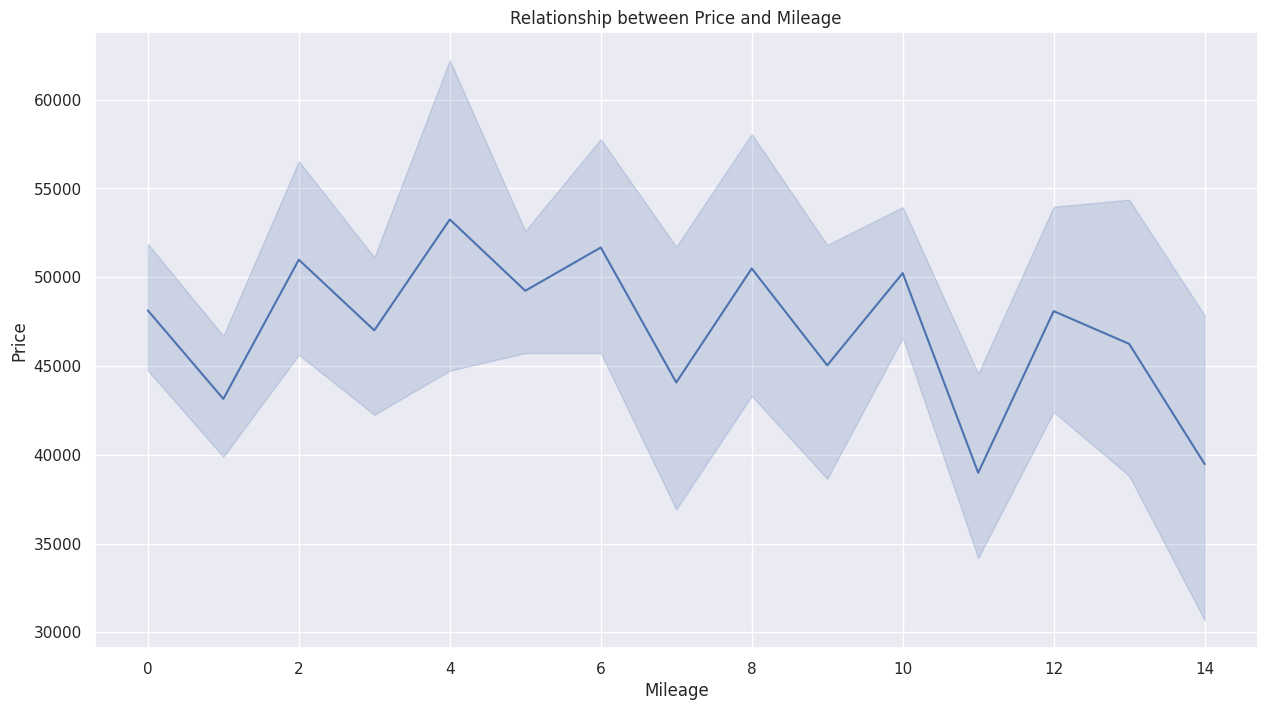

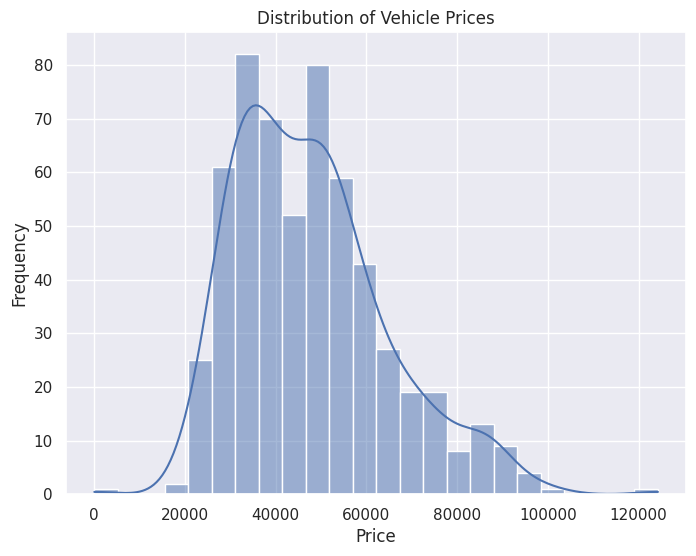

In [83]:

import seaborn as sns

sns.lineplot(x='mileage', y='price', data=vdf)
plt.title('Relationship between Price and Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')

# Histogram to show the distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(vdf['price'], kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


* Reverse Correlation between mileage and price
* Price Distribution is between 30000 to 60000


Top 5 Body Styles:
 body
SUV              394
Pickup Truck     116
Sedan             33
Cargo Van         19
Passenger Van      7
Name: count, dtype: int64


<ipython-input-11-fe3753b7a7ff>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='body', data=vdf, order=body_counts.index[:5],palette="magma")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

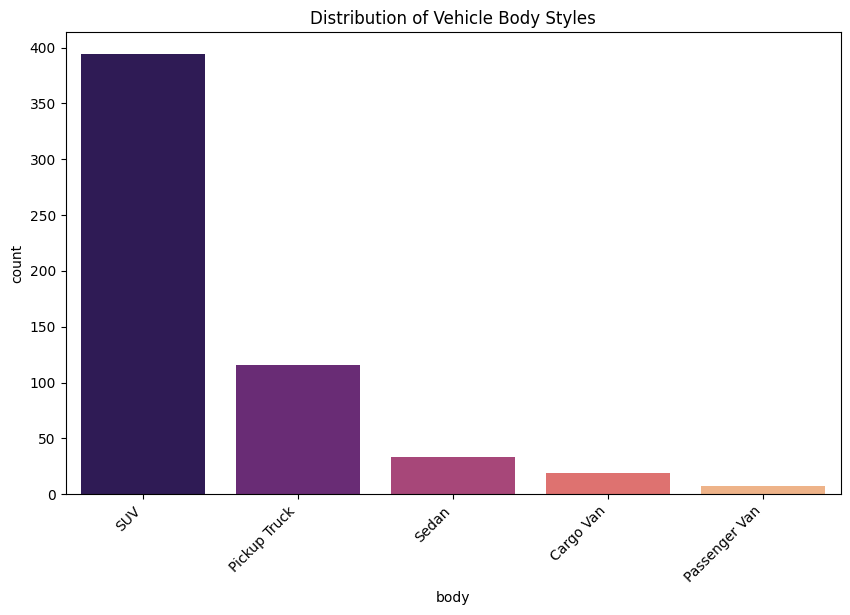


Top 10 Vehicle Brands:
 make
Jeep          133
Hyundai        63
Dodge          52
RAM            49
Ford           45
Chevrolet      41
Nissan         33
Mazda          33
Volkswagen     28
Kia            17
Name: count, dtype: int64


<ipython-input-11-fe3753b7a7ff>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='make', data=vdf, order=brand_counts.index[:10],palette="magma")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

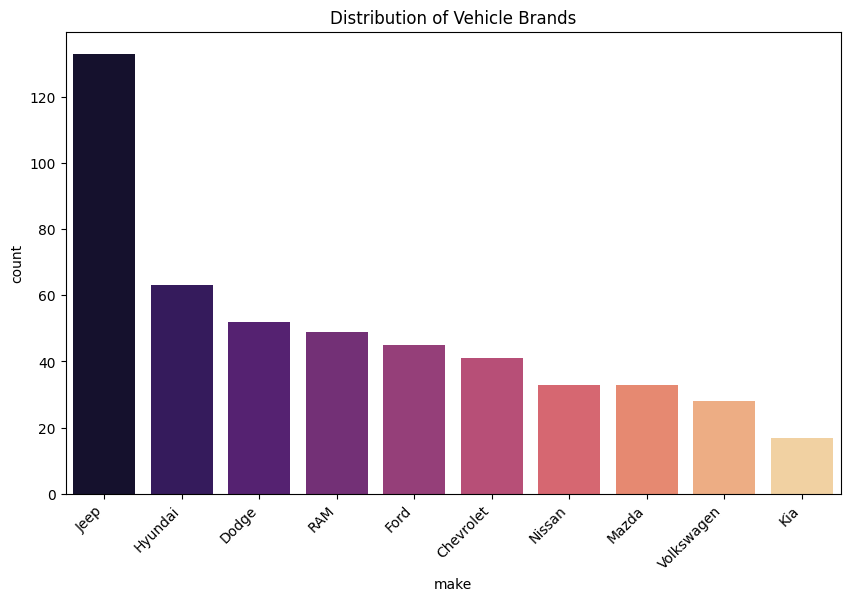

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


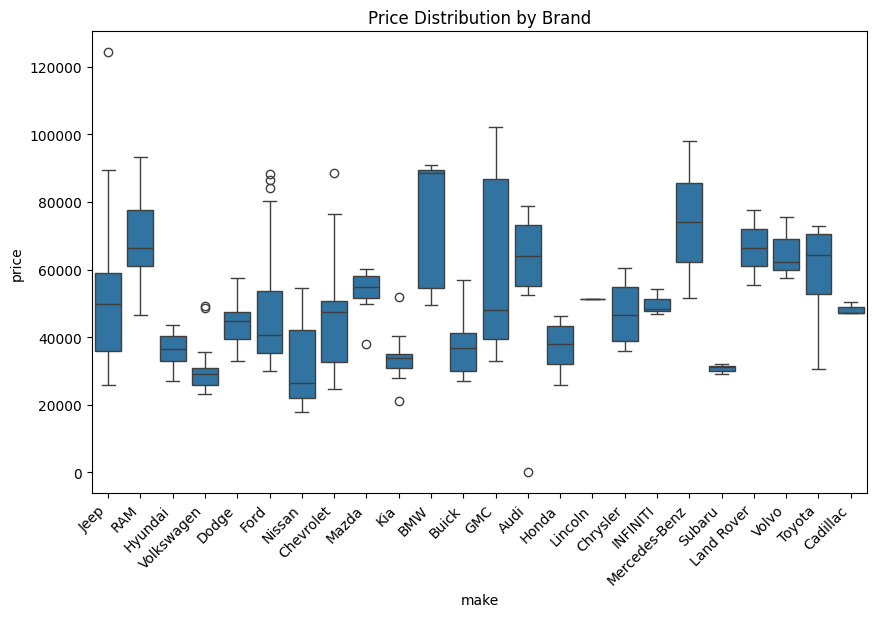

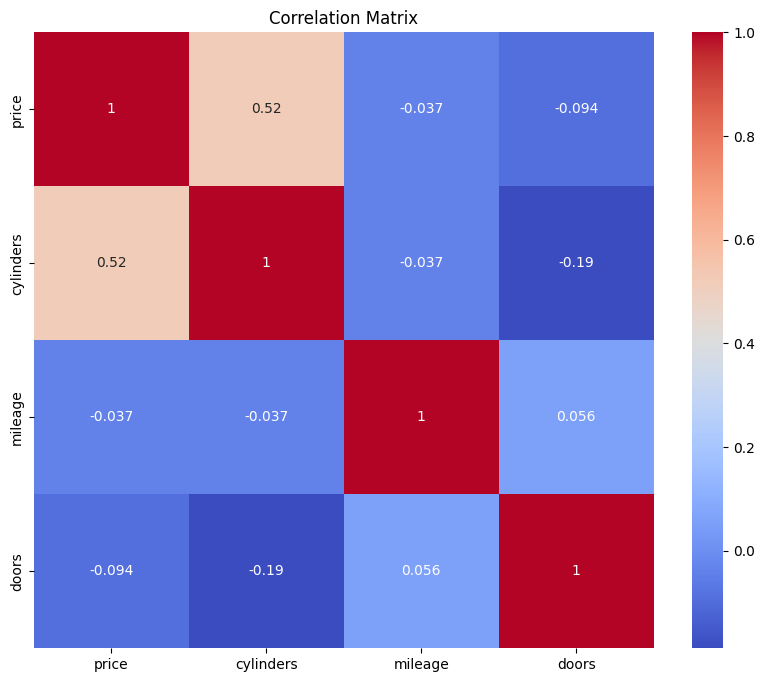

In [11]:
# market segmentation and identify trends in body, brands, and pricing also do as data goes larger shows only top ten
import matplotlib.pyplot as plt
# Market Segmentation by Body Style
body_counts = vdf['body'].value_counts()
print("Top 5 Body Styles:\n", body_counts.head(5))

plt.figure(figsize=(10, 6))
sns.countplot(x='body', data=vdf, order=body_counts.index[:5],palette="magma")
plt.title('Distribution of Vehicle Body Styles')
plt.xticks(rotation=45, ha='right')
plt.show()

# Market Segmentation by Brand
brand_counts = vdf['make'].value_counts()
print("\nTop 10 Vehicle Brands:\n", brand_counts.head(10))

plt.figure(figsize=(10, 6))
sns.countplot(x='make', data=vdf, order=brand_counts.index[:10],palette="magma")
plt.title('Distribution of Vehicle Brands')
plt.xticks(rotation=45, ha='right')
plt.show()

# Market Segmentation by Pricing and Trends
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='price', data=vdf)
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45, ha='right')
plt.show()

# Heatmap to show the correlation between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = vdf.select_dtypes(include=['number']).corr() # Select only numerical columns for correlation calculation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Additional Analysis
# You can further analyze the data by looking at correlations between price, mileage, and other features.
# You can also segment the market based on other factors, such as fuel type, drivetrain, etc.
# You can create visualizations to show the relationships between different variables.
# For example, a scatter plot of price vs. mileage can show the trend of how price changes with mileage.

# Note: As the data grows larger, you can use techniques like clustering or principal component analysis to further segment the market and identify trends.




* Maximum body is of SUV type
* Top make is  Jeep , Hyundai,RAM ..
* Some make has low price range like Hyundai, Volkswagon, Kia, Mazda
* While Jeep, Nissan, Cheverolet, BMW GMCMercedes-Banz have more price range means availibility is higher in models
* Seems Positive correlation between Price and Cylinder




More kind of body found is **SUV** means more demand for this kind of baby make by different companies then it comes **Pickup Trucks**.
In that **Jeep** make only these two types of body vehichle.
Similarly **RAM** makes only Cargo Van and ** Pickup Trucks**.
**Buick, cadillac, Dodge, Honda, INFINITI, Land Rover, Lincoin, Mazda, ** makes only **SUV** body type Vehichle.


In [73]:
Identify trends in pricing for top brands
top_brands = brand_counts.index[:10].tolist()
for brand in top_brands:
  brand_data = vdf[vdf['make'] == brand]
  print(f"\nPrice Trends for {brand}:")
  print(brand_data['price'].describe())

Identify trends in pricing for different body styles
for body_style in body_counts.index[:10].tolist():
  body_data = vdf[vdf['body'] == body_style]
  print(f"\nPrice Trends for {body_style}:")
  print(body_data['price'].describe())

SyntaxError: invalid syntax (<ipython-input-73-122ba2d20239>, line 1)

<ipython-input-14-4ce12cb09a31>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cylinders', data=vdf,palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list

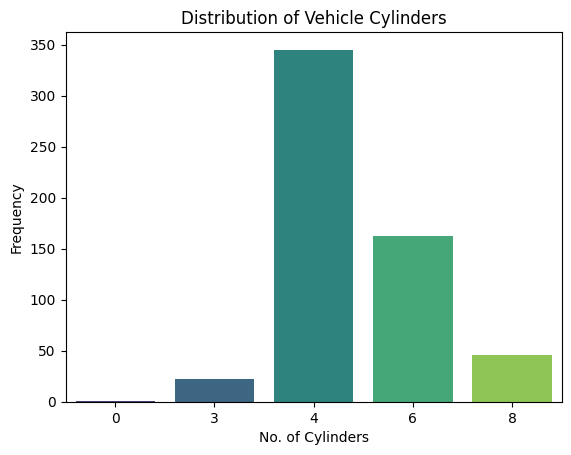

In [14]:
sns.countplot(x='cylinders', data=vdf,palette="viridis")
sns.set(rc={'figure.figsize':(8,5)})
plt.title('Distribution of Vehicle Cylinders')
plt.xlabel('No. of Cylinders')
plt.ylabel('Frequency')
plt.show()

**Maximum vehichle has 4 cylinder type**



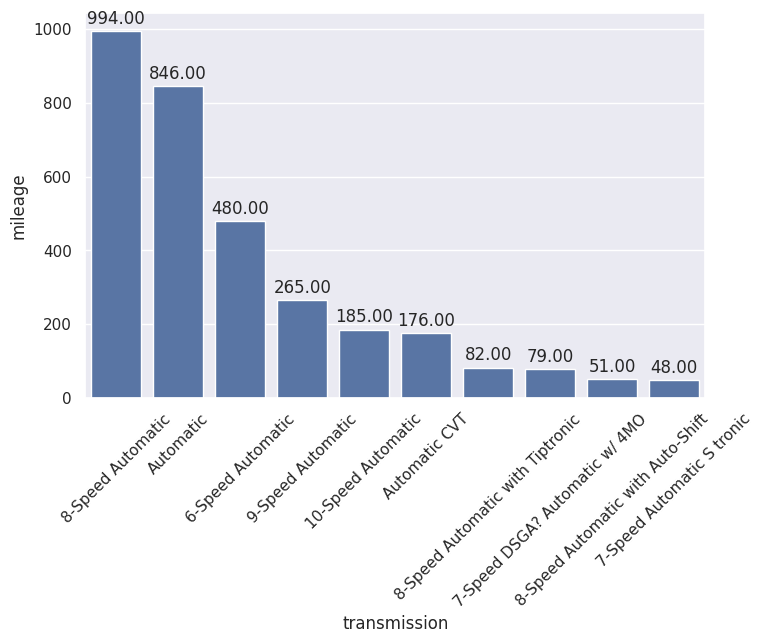

In [15]:
%matplotlib inline
trans_model=vdf.groupby(['transmission'],as_index=False)['mileage'].sum().sort_values(by='mileage',ascending = False)
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.barplot(x='transmission',y='mileage',data=trans_model.head(10))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')


**8 speed Automatic transmission has highest mileage**

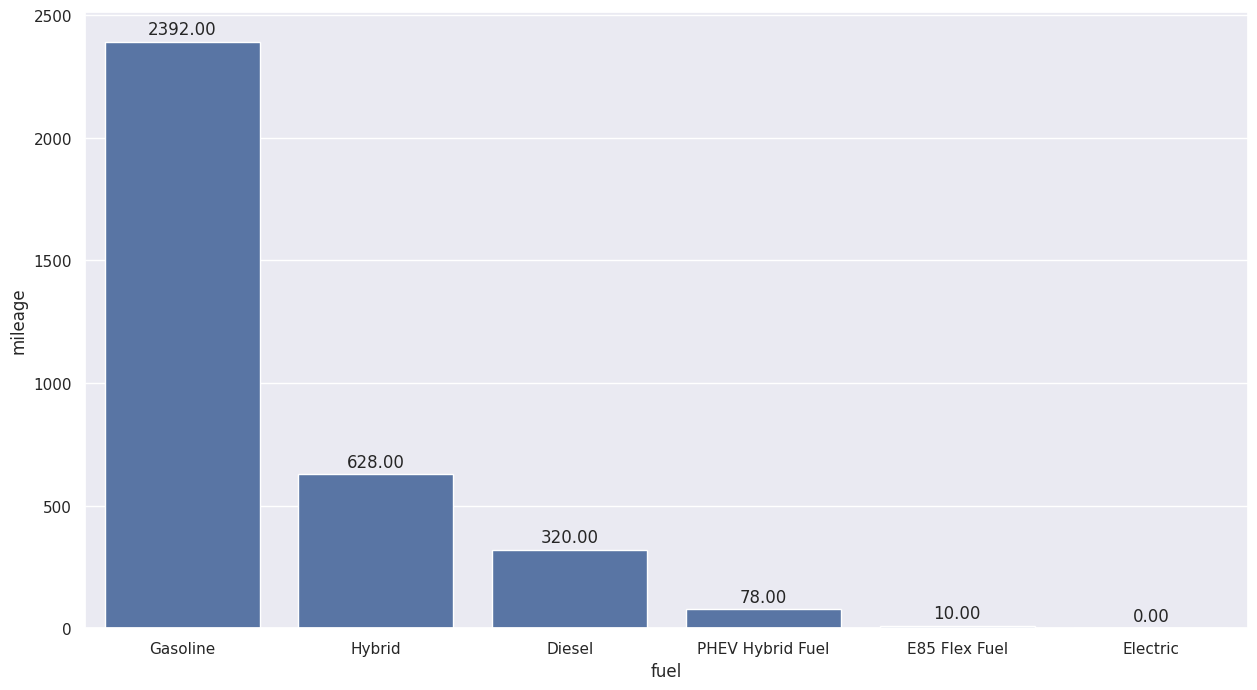

In [16]:
mile_model=vdf.groupby(['fuel'],as_index=False)['mileage'].sum().sort_values(by='mileage',ascending = False)
#plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(x='fuel',y='mileage',data=mile_model.head(10))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

**Gasoline Fuel has Highest Mileage**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


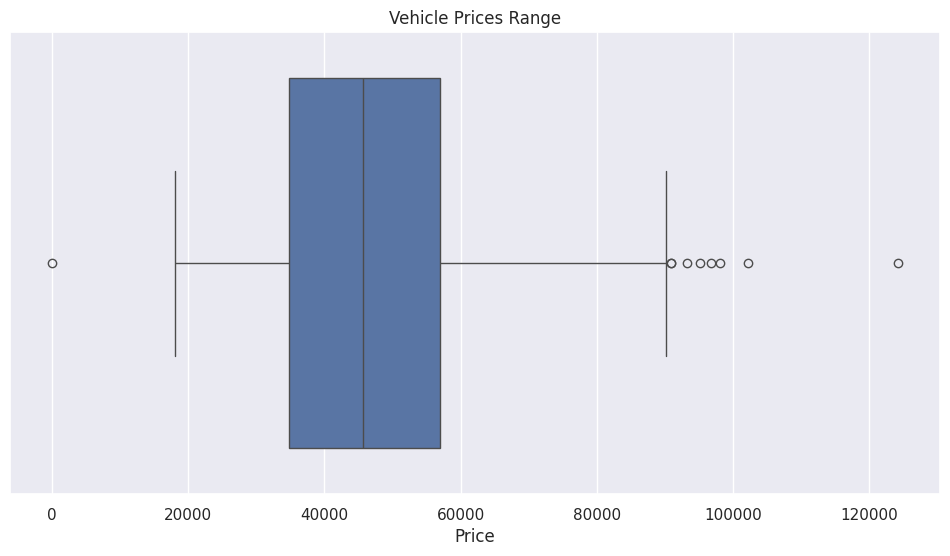

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=vdf['price'])
plt.xlabel('Price')
plt.title('Vehicle Prices Range')
plt.show()


Most vehichle range between 30000 to 60000.
 *some vehichle price goes above 90000 aspected as special adition vehichle or that has very low modelsavailable.*


Price Trends for Jeep SUV:
count       128.000000
mean      50119.609375
std       16734.995082
min       25999.000000
25%       35681.750000
50%       49642.500000
75%       59575.000000
max      124250.000000
Name: price, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


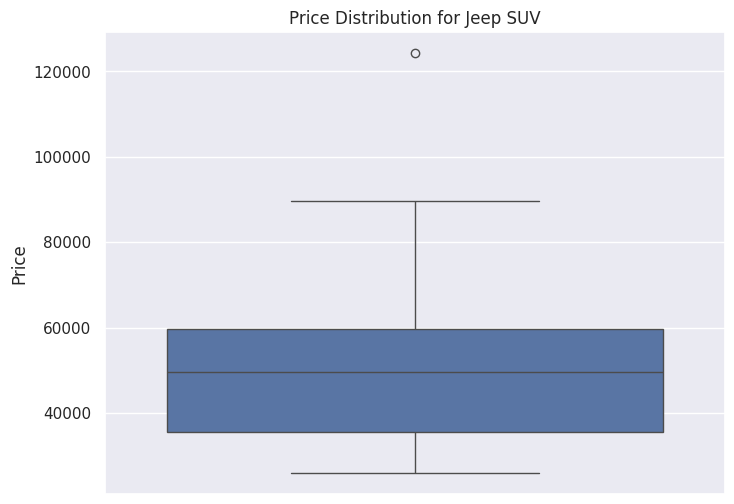


Price Trends for Hyundai SUV:
count       30.000000
mean     35902.933333
std       3968.553762
min      27555.000000
25%      33731.250000
50%      35805.000000
75%      39325.250000
max      41720.000000
Name: price, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


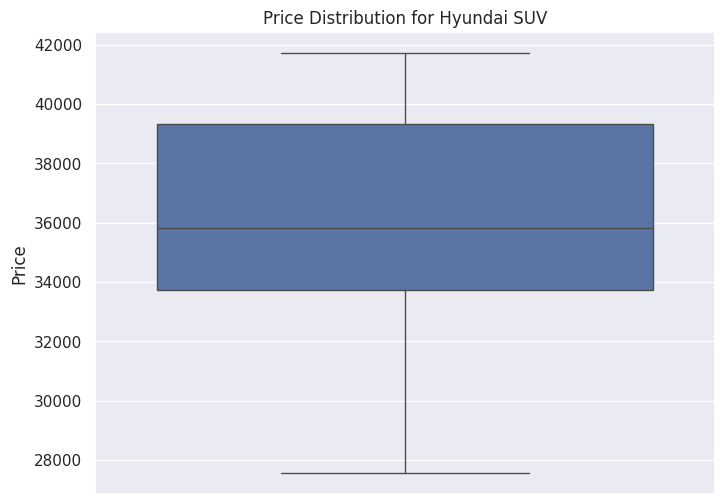


Price Trends for Dodge SUV:
count       52.00000
mean     44127.25000
std       5730.09555
min      32837.00000
25%      39558.50000
50%      44773.00000
75%      47340.00000
max      57486.00000
Name: price, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


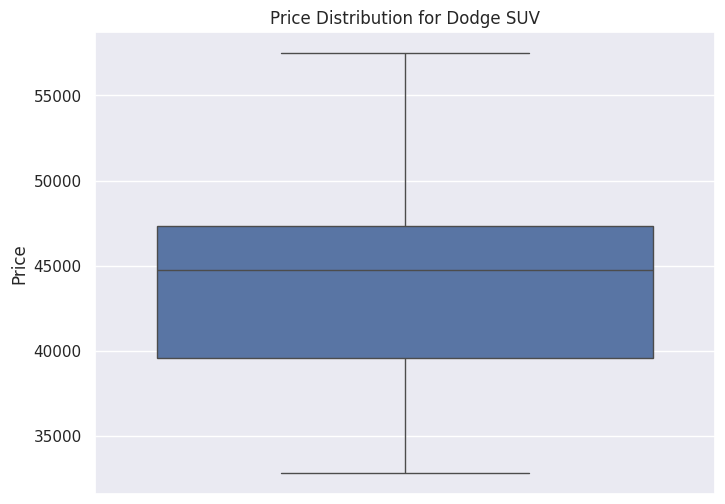


Price Trends for RAM Pickup Truck:
count       42.000000
mean     70515.619048
std      10427.500699
min      46670.000000
25%      63734.500000
50%      68081.000000
75%      80419.000000
max      93303.000000
Name: price, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


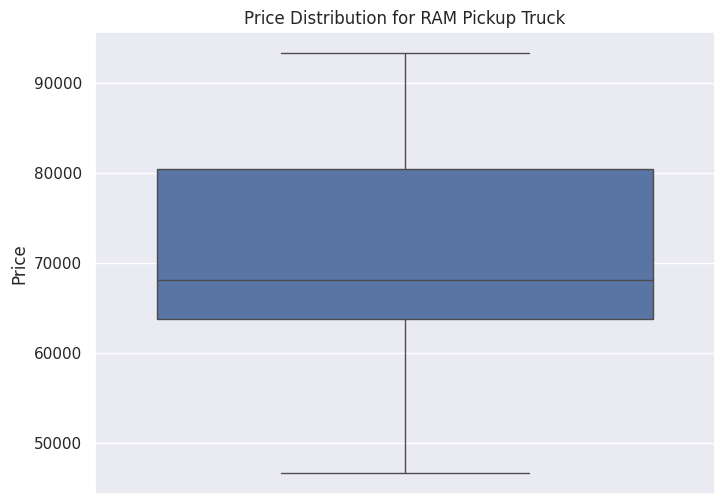


Price Trends for Ford SUV:
count       35.000000
mean     46530.142857
std      18133.951046
min      30020.000000
25%      34904.500000
50%      40145.000000
75%      48800.000000
max      88135.000000
Name: price, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


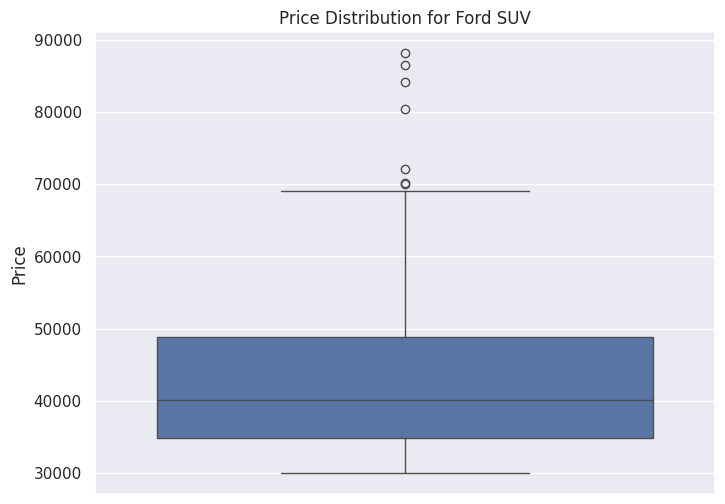

In [18]:
top_brands = vdf['make'].value_counts().head(5).index.tolist()

# Iterate over the top brands and their most common body styles
for brand in top_brands:
  # Find the most common body style for the current brand
  most_common_body = vdf[vdf['make'] == brand]['body'].value_counts().idxmax()

  # Filter data for the current brand and its most common body style
  brand_body_data = vdf[
      (vdf['make'] == brand) & (vdf['body'] == most_common_body)
  ]

  # Print price trends for the combination
  print(f"\nPrice Trends for {brand} {most_common_body}:")
  print(brand_body_data['price'].describe())

  # Create a box plot for price distribution
  plt.figure(figsize=(8, 6))
  sns.boxplot(y='price', data=brand_body_data)
  plt.title(f'Price Distribution for {brand} {most_common_body}')
  plt.ylabel('Price')
  plt.show()

In [21]:
# prompt: make continuous and categorical dataset

# Separate continuous and categorical features
continuous_features = vdf.select_dtypes(include=['number'])
categorical_features = vdf.select_dtypes(include=['object'])

# Print the column names for each type
print("Continuous Features:")
print(continuous_features.columns.tolist())
print("\nCategorical Features:")
print(categorical_features.columns.tolist())


Continuous Features:
['price', 'cylinders', 'mileage', 'doors']

Categorical Features:
['make', 'model', 'fuel', 'transmission', 'body']


In [55]:

from sklearn.model_selection import train_test_split

# Assuming 'price' is your target variable
X = vdf.drop('price', axis=1)
y = vdf['price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (460, 171)
X_test shape: (116, 171)
y_train shape: (460,)
y_test shape: (116,)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.5476168222131091e+29
R-squared: -5.854684803359453e+20


In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

# Assuming 'price' is your target variable
X = vdf.drop('price', axis=1)
y = vdf['price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Build the deep learning model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)


# Make predictions on the test data
y_pred = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 2654716416.0000 - mae: 48804.5898 - val_loss: 2524144128.0000 - val_mae: 48070.1367
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2661193728.0000 - mae: 48672.6797 - val_loss: 2520912128.0000 - val_mae: 48036.9141
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2638813184.0000 - mae: 48519.0273 - val_loss: 2503927552.0000 - val_mae: 47866.6836
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2621126144.0000 - mae: 48067.3984 - val_loss: 2436242688.0000 - val_mae: 47190.5430
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2447864320.0000 - mae: 46334.5664 - val_loss: 2231181056.0000 - val_mae: 45102.8516
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2160629760.0000 - mae: 43183.6367 - val_loss: 1765511680.0000 - val_mae: 39915.5117
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1488036608.0000 - mae: 35371.8359 - val_loss: 1015926976.0000 - val_mae: 29316.687

In [61]:
from sklearn.metrics import accuracy_score

# Convert predicted values to binary classification (e.g., based on a threshold)
y_pred_binary = (y_pred > np.mean(y_test)).astype(int)  # Adjust threshold as needed
y_test_binary = (y_test > np.mean(y_test)).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)


Accuracy: 0.9051724137931034


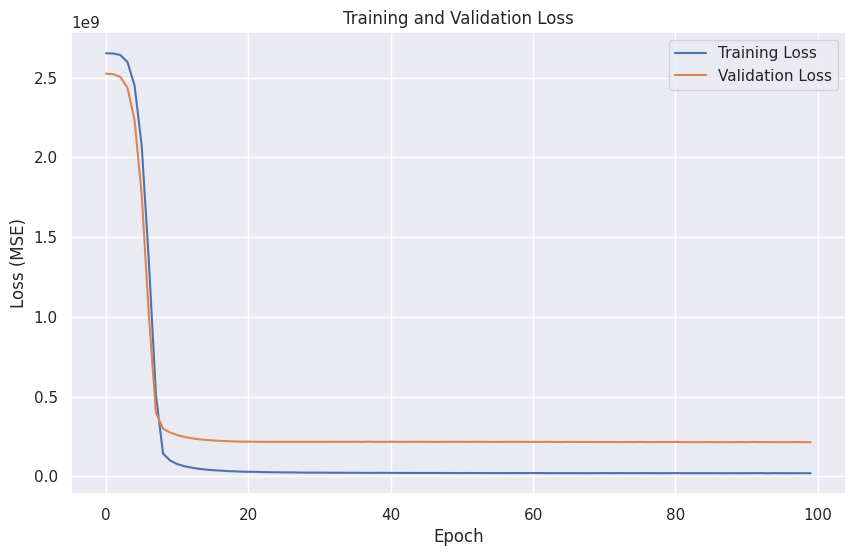

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()